In [4]:
import random
import copy

import numpy as np

from numba import jit, njit, cuda, prange

import matplotlib.pyplot as plt

# Random Walker With Pure Python

In [294]:
steps = int(1e5)

In [296]:
X = [0]*(steps+1)
T = [i for i in range(steps + 1)]

In [298]:
for i in range(steps):
    rand = random.uniform(0, 1) - 0.5
    rand /= abs(rand)

    X[i+1] = X[i] + rand

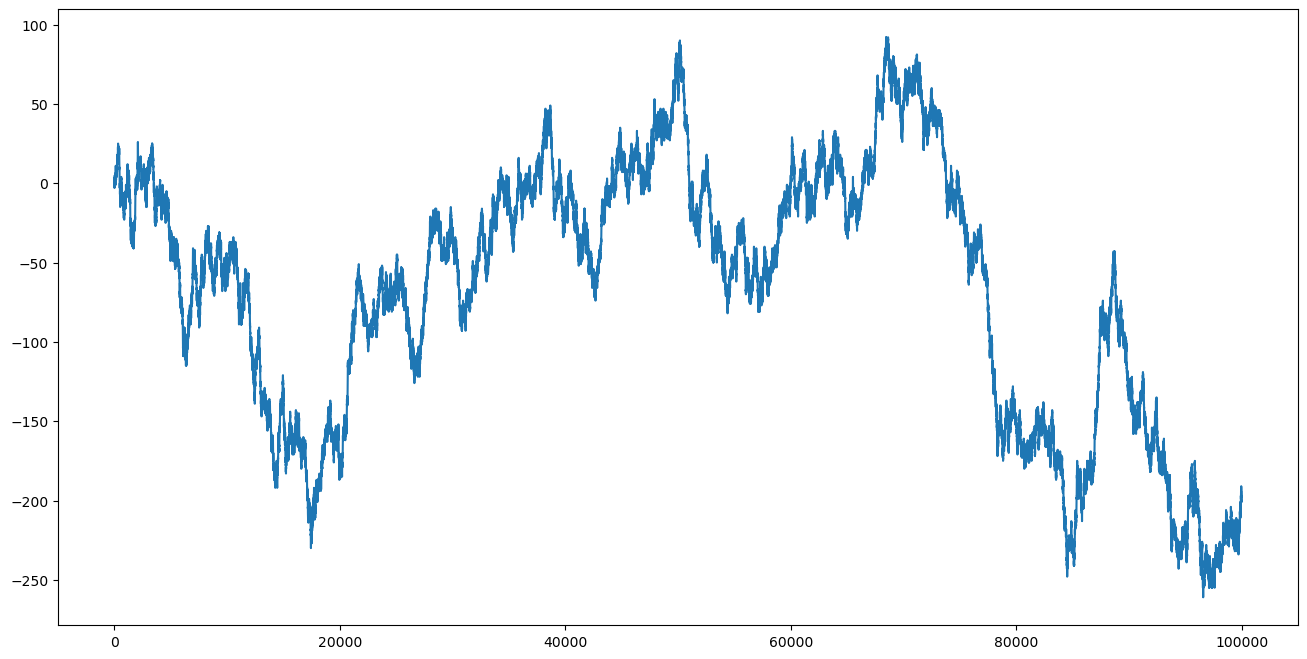

In [300]:
plt.figure(figsize = (16, 8))
plt.plot(T, X)
plt.show()

# 1D Random Walker With Numpy

In [366]:
generator = np.random.default_rng()
n_steps = int(4e7)

In [368]:
steps = generator.random(n_steps) - 0.5
steps /= np.abs(steps)

In [370]:
T = np.arange(n_steps + 1)
X = np.insert(np.cumsum(steps), 0, 0)

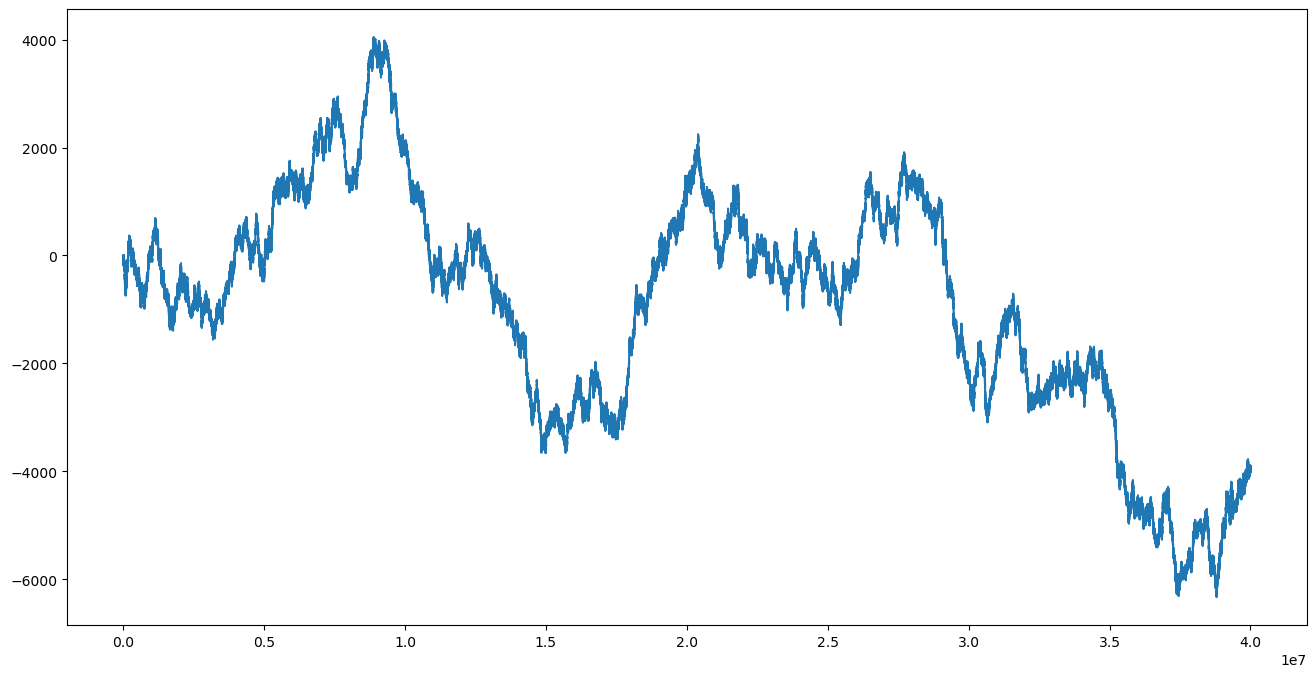

In [372]:
plt.figure(figsize = (16, 8))
plt.plot(T, X)
plt.show()

# 1D Random Walker With Numba

In [384]:
@jit(target_backend='cuda')
def random_walker(steps):

    steps = int(steps)
    
    X = [0]*(steps+1)
    T = [i for i in range(steps + 1)]
    
    for i in range(steps):
        rand = random.uniform(0, 1) - 0.5
        rand /= abs(rand)
    
        X[i+1] = X[i] + rand

    return X, T

In [396]:
X, T = random_walker(5e7)

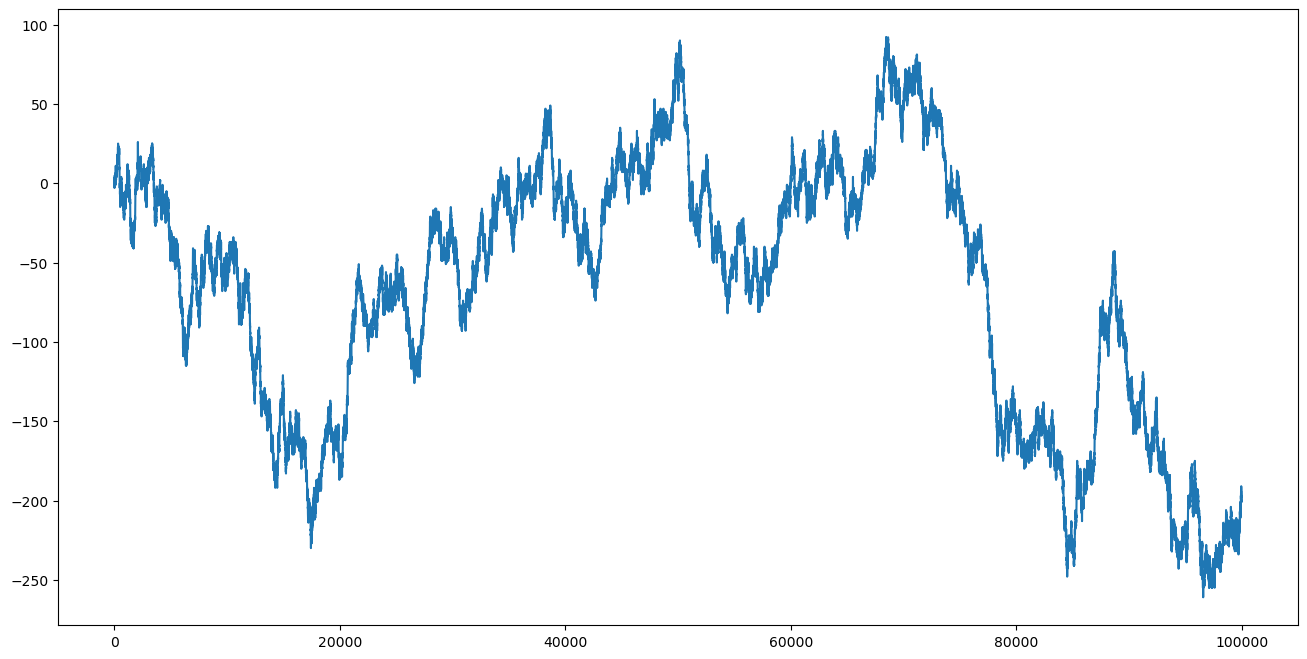

In [300]:
plt.figure(figsize = (16, 8))
plt.plot(T, X)
plt.show()

# N-1D Random Walkers With Pure Python

In [483]:
walkers = int(5e2)
steps = int(1e4)

In [485]:
T = [i for i in range(steps + 1)]

In [487]:
random_walks = []
for j in range(walkers):

    X = [0]*(steps+1)
    
    for i in range(steps):
        rand = random.uniform(0, 1) - 0.5
        rand /= abs(rand)
    
        X[i+1] = X[i] + rand
    
    random_walks.append(X)

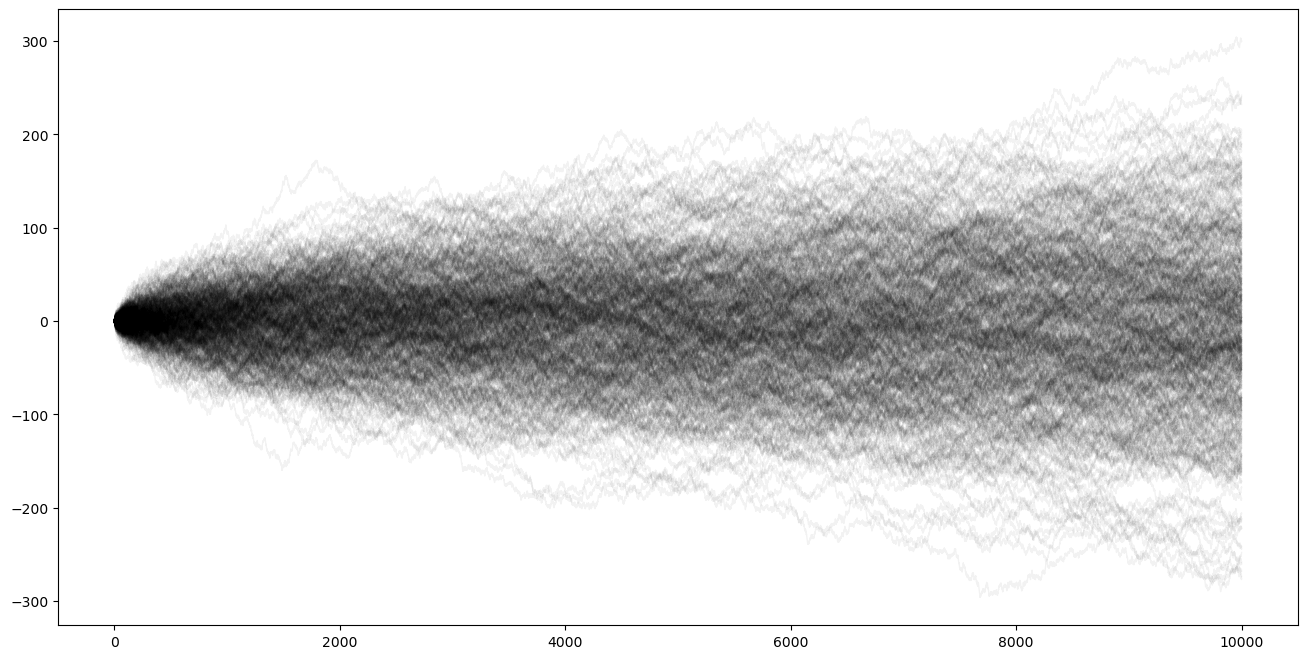

In [491]:
plt.figure(figsize = (16, 8))

for i in range(walkers):
    plt.plot(T, random_walks[i], c='k', linewidth=1, alpha=0.05)

plt.show()

# N-1D Random Walkers With Numpy

In [778]:
generator = np.random.default_rng()
walkers = int(5e3)
n_steps = int(1e3)

In [780]:
steps = generator.random((walkers, n_steps)) - 0.5
steps /= np.abs(steps)

In [782]:
T = np.arange(n_steps + 1)
X = np.insert(np.cumsum(steps, axis=1), 0, 0, axis=1)

In [784]:
mean_pos = np.mean(X, axis=0)
mean_squared_dis = np.mean(X**2, axis=0)
print(f'Mean of Mean Positions At Each Time Step = {mean_pos.mean()}')

Mean of Mean Positions At Each Time Step = 0.26611428571428575


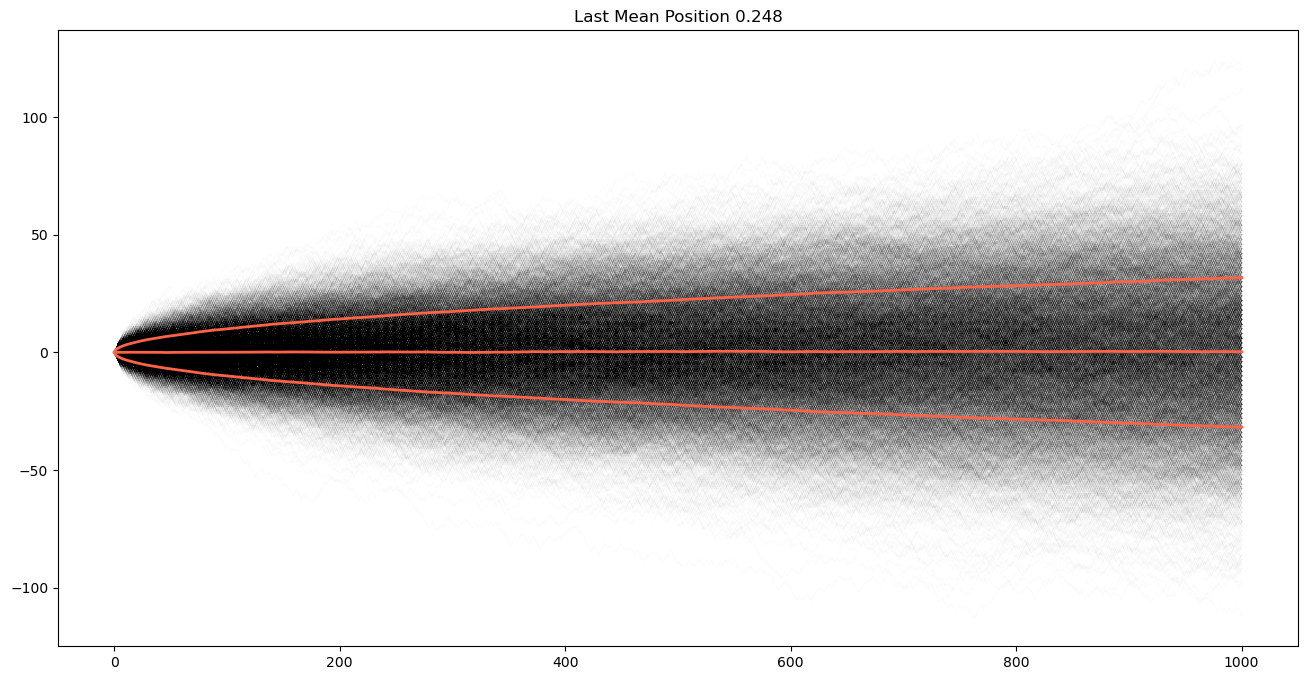

In [814]:
plt.figure(figsize = (16, 8))

for i in range(walkers):
    plt.plot(T, X[i], c='k', linewidth=1, alpha=0.01)

plt.plot(T, mean_pos, c='tomato', linewidth=2)
plt.plot(T, np.sqrt(mean_squared_dis), c='tomato', linewidth=2)
plt.plot(T, -np.sqrt(mean_squared_dis), c='tomato', linewidth=2)

plt.title(f'Last Mean Position {np.round(mean_pos[-1], 3)}')
plt.show()

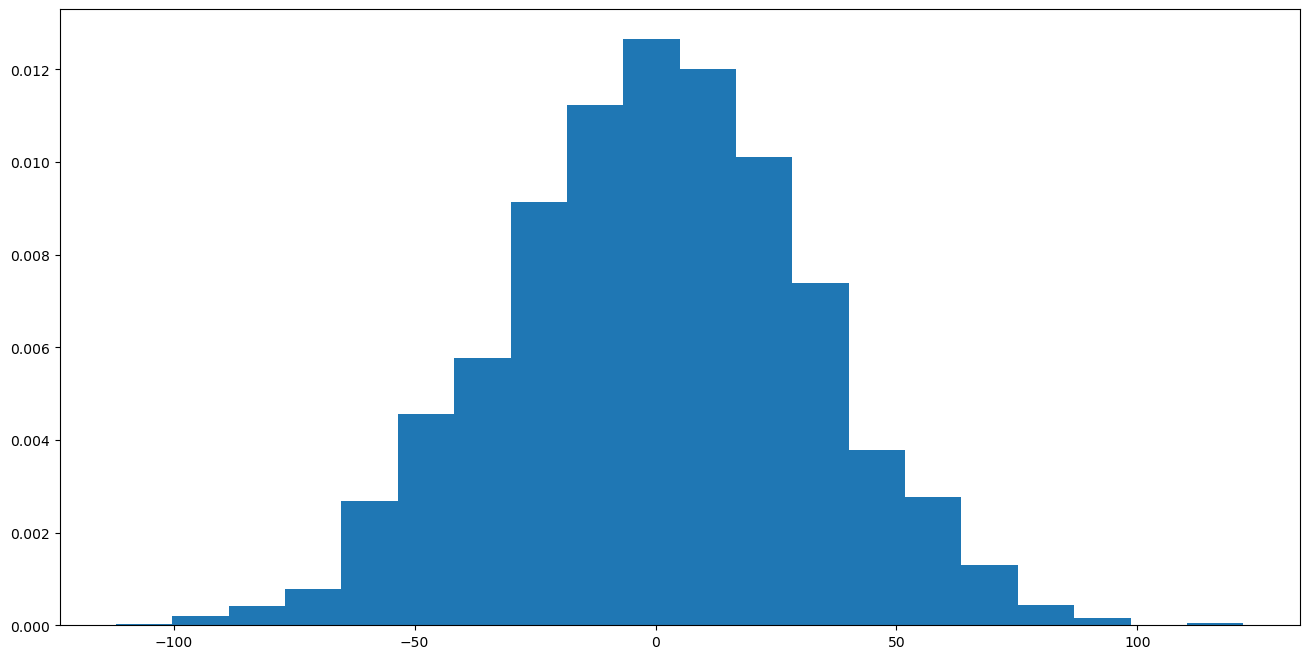

In [796]:
plt.figure(figsize = (16, 8))
plt.hist(X[:, -1], density=True, bins=20)
plt.show()

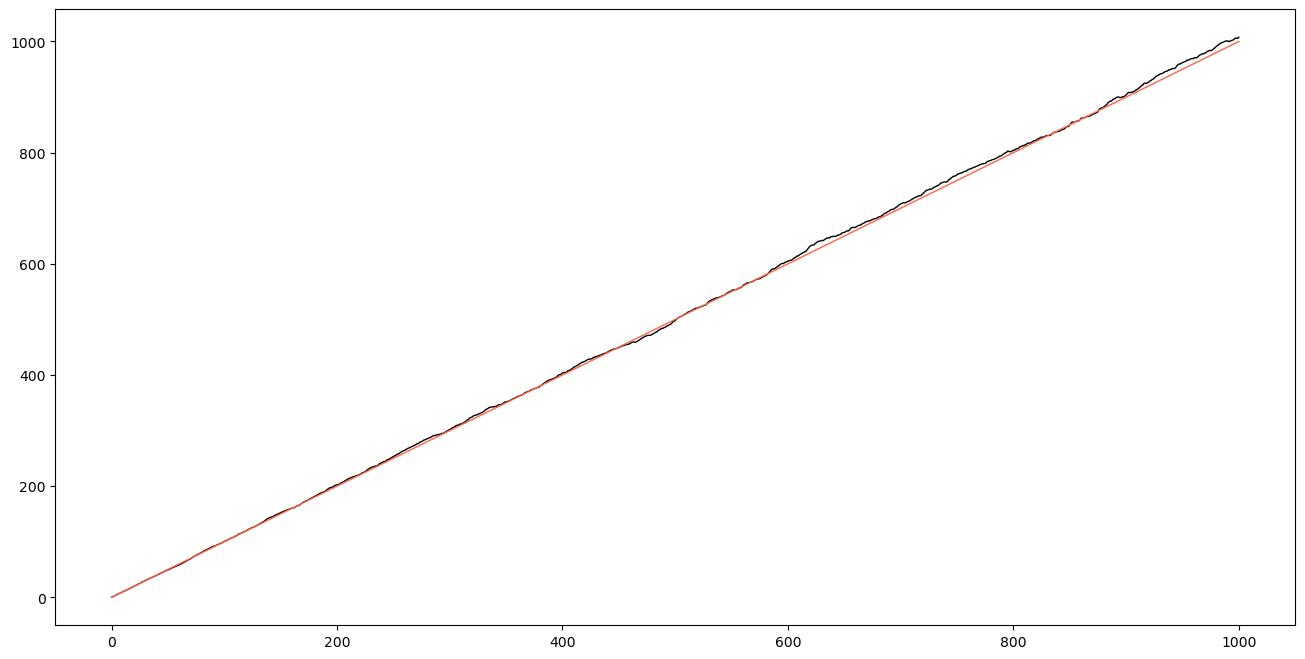

In [804]:
plt.figure(figsize = (16, 8))
plt.plot(T, mean_squared_dis, c='black', linewidth=1, label='Mean Squared Displacement Per Time Step')
plt.plot(T, T, linewidth=1, c='tomato', label='y=x')
plt.show()

# N-1D Random Walkers With Numba

In [12]:
#@jit(target_backend='cuda') for nvidia graphic card
@jit
def random_walkers(walkers, steps):

    walkers = int(walkers)
    steps = int(steps)
    
    T = [i for i in range(steps + 1)]
    
    random_walks = []
    for j in range(walkers):
    
        X = [0]*(steps+1)
        
        for i in range(steps):
            rand = random.uniform(0, 1) - 0.5
            rand /= abs(rand)
        
            X[i+1] = X[i] + rand
        
        random_walks.append(X)

    return random_walks, T

In [16]:
walkers = 5e3
n_steps = 1e3
X, T = random_walkers(walkers, n_steps)

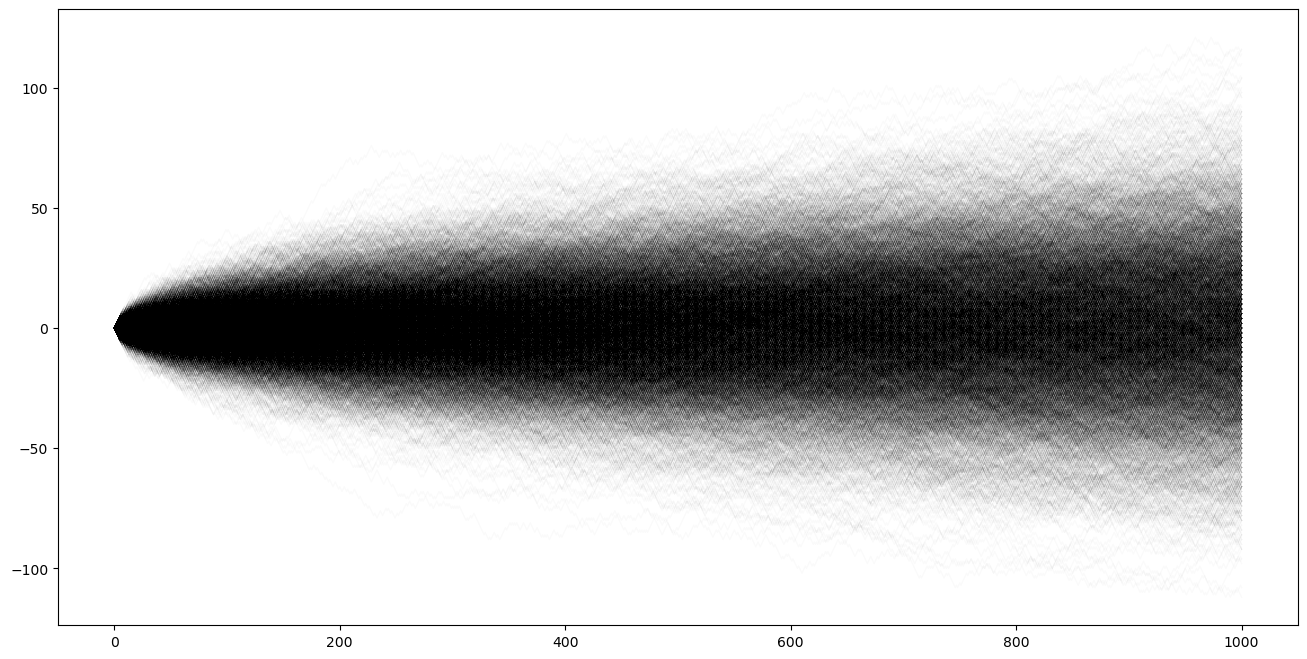

In [18]:
plt.figure(figsize = (16, 8))

for i in range(int(walkers)):
    plt.plot(T, X[i], c='k', linewidth=1, alpha=0.02)

plt.show()